In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from scipy.special import factorial
import warnings


# Задача №1 и №2
Функция show_trusted_interval() проводит все необходимые измерения - строит график зависимости доверительного интервала от n и вычисляет вероятность попадания случайных значений из распределения в интервал. (get_low_bound, get_up_bound) - пара статистик, которые являются нашим доверительным интервалом. Я генерирую 99999 выборок по N=100 значений, что достаточно, чтобы проверить вероятность (если хочется, можете сделать побольше).

Для каждого распределения мы генерируем выборку, определяем функции get_low_bound и get_up_bound, и проводим эксперимент, вызывая show_trusted_interval().

In [24]:

theta = 10
RANDVAR_COUNT = 100
TRUST_LEVEL = 0.95
INF = 999999

def show_trusted_interval(sps_distribution, sample, randvar_count, get_low_bound, get_up_bound, ylim=()):
    x = [x for x in range(1, randvar_count)]
    low_bounds = [get_low_bound(sample[:n]) for n in x]
    up_bounds = [get_up_bound(sample[:n]) for n in x]
    
    plt.figure(figsize=(15, 9))
    plt.fill_between(x, low_bounds, up_bounds, color='y')
    
    plt.plot(x, [theta] * len(x), 'b', label=r"real $\theta$")
    
    plt.ylim(*ylim)
    plt.xlabel('n', fontsize=21)
    plt.ylabel(r'$\theta$', fontsize=21)
    plt.title(r'Зависимость доверительного интервала $\theta$ от кол-ва измерений', fontsize=21)
    plt.show()
    
    print('Hit probability = {0}'.format(calc_interval_hit_probability(sps_distribution, get_low_bound, get_up_bound)))
    
def calc_interval_hit_probability(sps_distribution, get_low_bound, get_up_bound):
    SAMPLES_COUNT = 99999
    
    hit_sample = [sps_distribution.rvs(RANDVAR_COUNT) for n in range(SAMPLES_COUNT)]

    from itertools import filterfalse
    hit_count = len(list(filterfalse(lambda array : not np.array(get_low_bound(array)) <= theta <= 
                                     np.array(get_up_bound(array)), hit_sample)))
    return hit_count / len(hit_sample)


# Равномерное распределение


In [40]:
distrib = sps.uniform(loc=0, scale=theta)
sample = distrib.rvs(RANDVAR_COUNT)


* Построим доверительный интервал используя статистику $\overline{X}$


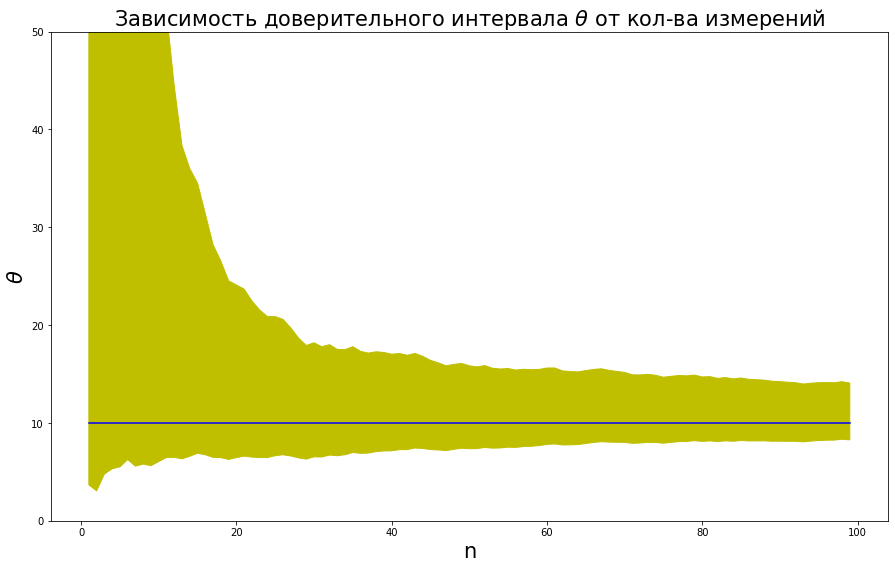

Hit probability = 1.0


In [41]:

get_low_bound = lambda sample : np.mean(sample) / (0.5 + 1 / ((12 * len(sample) * (1 - TRUST_LEVEL)) ** 0.5))
def get_up_bound(sample):
    value = np.mean(sample) / (0.5 - 1 / ((12 * len(sample) * (1 - TRUST_LEVEL)) ** 0.5))
    return value if value > 0 else INF

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, (0, 50))


* Построим доверительный интервал используя статистику $X_{(n)}$


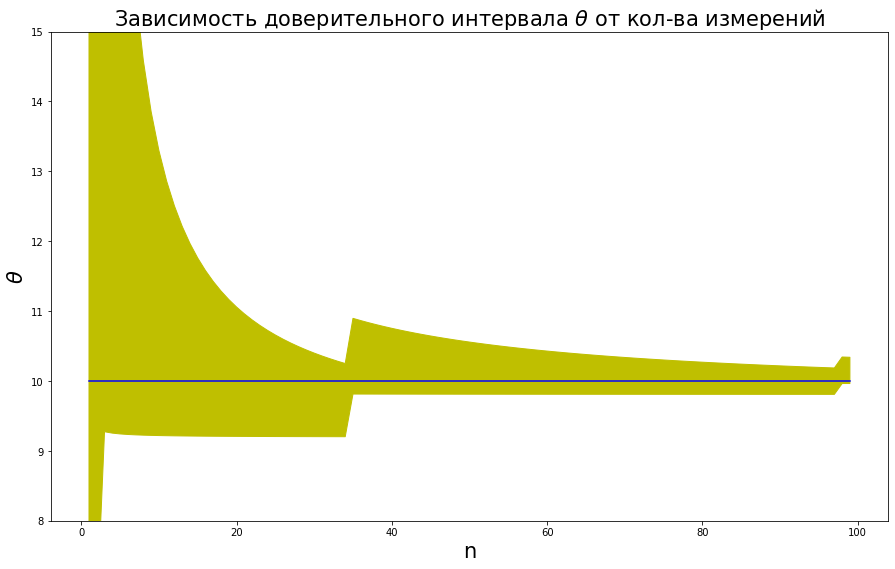

Hit probability = 0.9514951495149515


In [42]:

def get_low_bound(sample):
    return np.max(sample) / (((1 + TRUST_LEVEL) / 2) ** (1 / len(sample)))

def get_up_bound(sample):
    return np.max(sample) / (((1 - TRUST_LEVEL) / 2) ** (1 / len(sample)))

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, ylim=(8, 15))


* Построим доверительный интервал используя статистику $X_{(1)}$


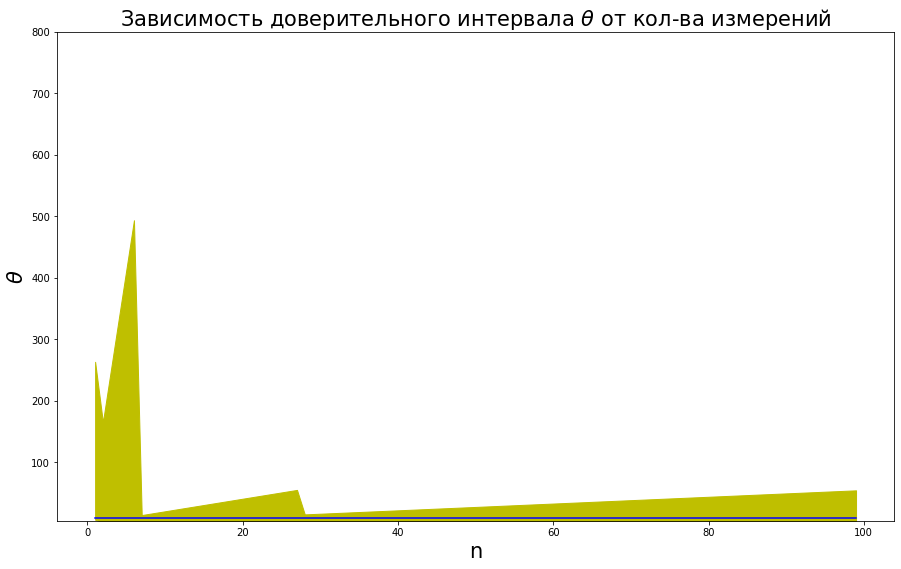

Hit probability = 0.9477947794779478


In [43]:

def get_low_bound(sample):
    return np.min(sample) / (1 - ((1 - TRUST_LEVEL) / 2) ** (1 / len(sample)))

def get_up_bound(sample):
    return np.min(sample) / (1 - ((1 + TRUST_LEVEL) / 2) ** (1 / len(sample)))

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, ylim=(5, 800))


* Вывод по равномерному распределению - $X_{(1)}$ - очень плохая оценка (интервал очень широкий, даже, если выборка большая), ибо мы оцениваем верхнюю оценку интервала через минимальное значение у выборки, что неэффективно. Также этот интервал не является точным. Оценка через mean получилась самой лучшей - этот интервал гарантирует, что параметр попадёт в интервал с вероятностью больше чем 0.95

# Распределение Коши


Данный интервал является точным. Квантиль q - это $(1+\alpha)/2$ квантиль нормального стандартного распределения, в данном случае она равна 1.96

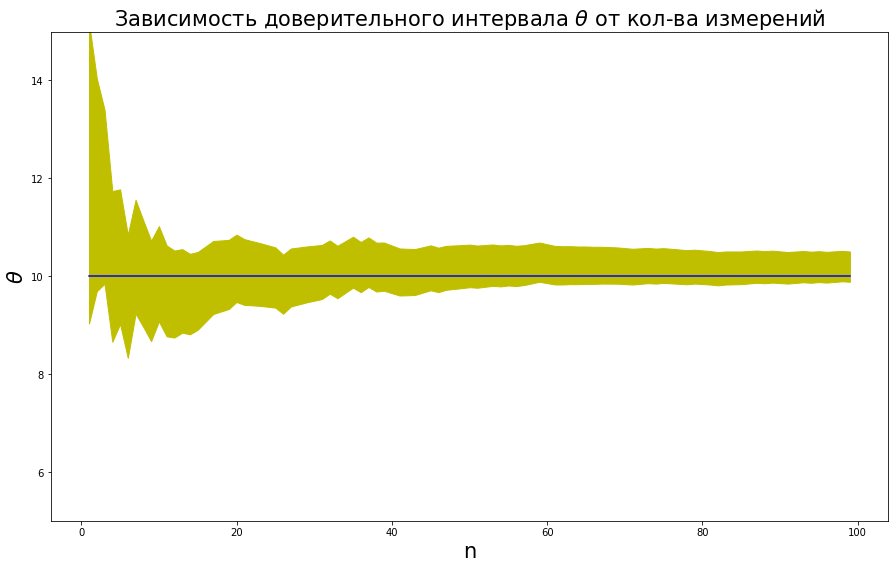

Hit probability = 0.95009500950095


In [35]:
distrib = sps.cauchy(loc=theta)
sample = distrib.rvs(RANDVAR_COUNT)
q = 1.96

def get_low_bound(sample):
    return np.median(sample) - np.pi * q / 2 / (len(sample) ** 0.5)

def get_up_bound(sample):
    return np.median(sample) + np.pi * q / 2 / (len(sample) ** 0.5)

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, ylim=(5, 15))


# Пуассоновское распределение


Этот интервал точный.

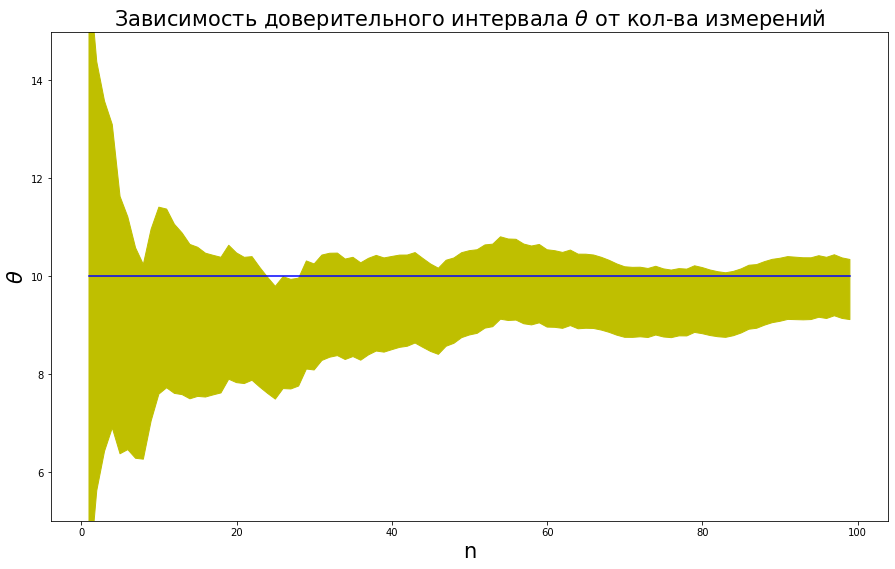

Hit probability = 0.9472947294729473


In [36]:
distrib = sps.poisson(mu=theta)
sample = distrib.rvs(RANDVAR_COUNT)

def get_low_bound(sample):
    return np.mean(sample) - np.sqrt(np.mean(sample) / len(sample)) * q

def get_up_bound(sample):
    return np.mean(sample) + np.sqrt(np.mean(sample) / len(sample)) * q

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, ylim=(5, 15))


# Гамма распределение


Интервал является точным.

In [37]:
Lambda = 3
distrib = sps.gamma(a=theta, scale=1/Lambda)
sample = distrib.rvs(RANDVAR_COUNT)


$\lambda$ известна


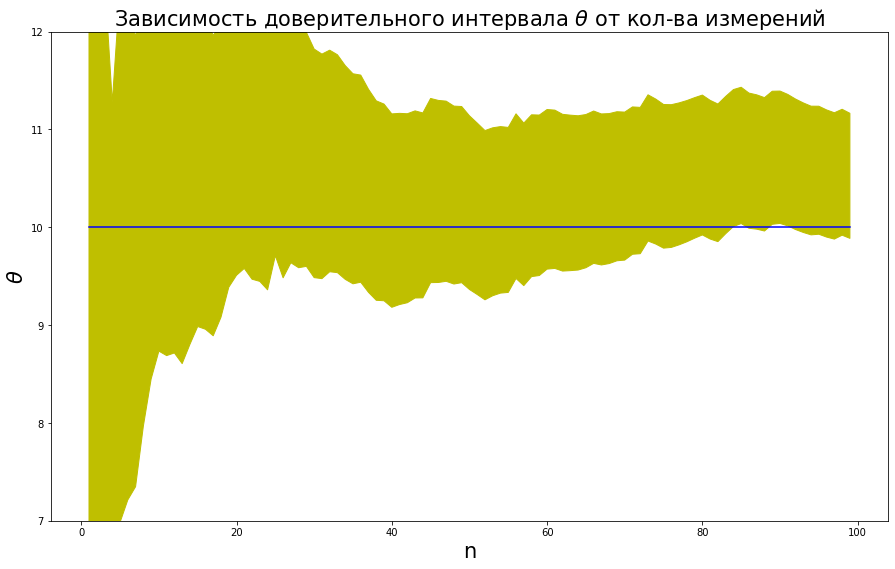

Hit probability = 0.9506950695069507


In [38]:

def get_low_bound(sample):
    return Lambda * np.mean(sample) - np.sqrt(Lambda * np.mean(sample) / len(sample)) * q

def get_up_bound(sample):
    return Lambda * np.mean(sample) + np.sqrt(Lambda * np.mean(sample) / len(sample)) * q 

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, ylim=(7, 12))


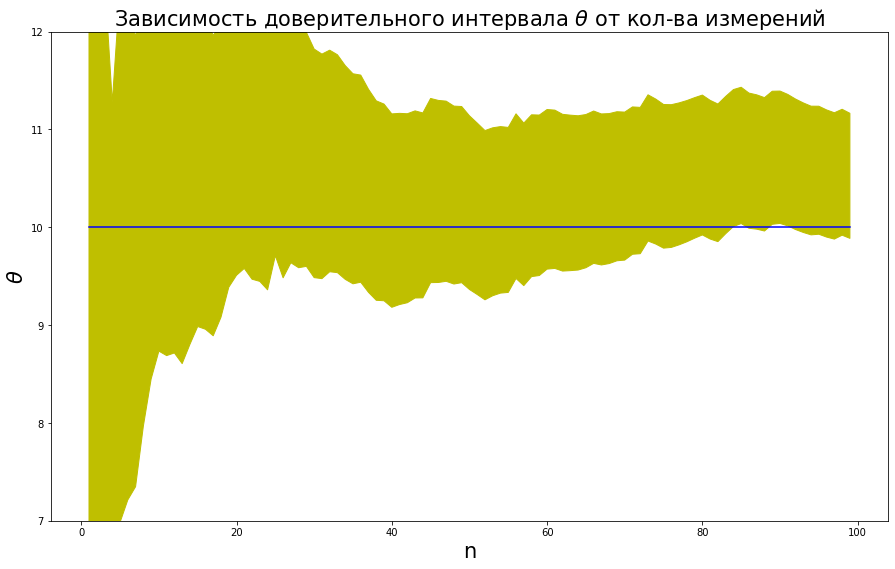

Hit probability = 0.9492949294929492


In [39]:

def gamma_left_unknown(sample):
    return Lambda * np.mean(sample) - np.sqrt(Lambda * np.mean(sample) / len(sample)) * q

def gamma_right_unknown(sample):
    return Lambda * np.mean(sample) + np.sqrt(Lambda * np.mean(sample) / len(sample)) * q 

show_trusted_interval(distrib, sample, RANDVAR_COUNT, get_low_bound, get_up_bound, ylim=(7, 12))

Итого: мы правильно нашли доверительные интервалы, ибо при любом распределении параметр попадает в интервал почти всегда с вероятностью >= 95.

Заметим, что чем меньше наша выборка, тем больше наш интервал, что следует из того, что трудно хорошо оценить (с уровнем доверия 0.95), когда данных очень мало, поэтому надо взять интервал пошире.